In [1]:
using Plots
using DifferentialEquations

pyplot()    # use pyplot() backend

Plots.PyPlotBackend()

In [2]:
m1 = 1;                 # mass of pendulum 1 (in kg)
m2 = 1;                 # mass of pendulum 2 (in kg)
L1 = 1;                 # length of pendulum 1 (in meter)
L2 = 1;                 # length of pendulum 2 (in meter)
g = 9.8;                # gravitatioanl acceleration constant (m/s^2)

u0 = [pi/1.6; 0; pi/1.8; 0];    # initial conditions. 
# u[1] = angle of the first pendulum
# u[2] = angular velocity of the first pendulum
# u[3] = angle of the second pendulum
# u[4] = angular velocity of the second pendulum

tfinal = 100.0;       # Final time. Simulation time = 0 to tfinal.

In [3]:
# Differential equations describing the system
function double_pendulum(du,u,p,t)
    # du = derivatives
    # u = variables
    # p = parameters
    # t = time variable
    
    m1 = p[1];
    m2 = p[2];
    L1 = p[3];
    L2 = p[4];
    g = p[5];
  
    
    c = cos(u[1]-u[3]);  # intermediate variables
    s = sin(u[1]-u[3]);  # intermediate variables

    
    du[1] = u[2];   # d(theta 1)
    du[2] = ( m2*g*sin(u[3])*c - m2*s*(L1*c*u[2]^2 + L2*u[4]^2) - (m1+m2)*g*sin(u[1]) ) /( L1 *(m1+m2*s^2) );
    du[3] = u[4];   # d(theta 2)   
    du[4] = ((m1+m2)*(L1*u[2]^2*s - g*sin(u[3]) + g*sin(u[1])*c) + m2*L2*u[4]^2*s*c) / (L2 * (m1 + m2*s^2));
    
end

double_pendulum (generic function with 1 method)

In [4]:
# Solving the system

p = [m1;  m2;  L1;  L2;  g];
tspan = (0.0,tfinal);  # Time span (limits). The actual time variable is automatically set by solve().
prob = ODEProblem(double_pendulum,u0,tspan,p);
sol = solve(prob,Vern7(),reltol=1e-6);

#sol[1,:] = u1 = Θ_1
#sol[2,:] = u2 = ω_1
#sol[3,:] = u3 = Θ_2
#sol[4,:] = u4 = ω_2
#sol.t = t = time variable. The ODE solver automatically chooses the time steps. Note that t is not uniformly spaced.



In [5]:
# Extract the variables from the solution 

tm = sol.t;

# Mapping from polar to Cartesian
x1 = L1*sin.(sol[1,:]);          # First Pendulum
y1 = -L1*cos.(sol[1,:]);

x2 = x1 + L2*sin.(sol[3,:]);     # Second Pendulum
y2 = y1 - L2*cos.(sol[3,:]);

In [6]:
# Animation setup
# Refs.
# 1. http://docs.juliaplots.org/latest/attributes/
# 2. http://docs.juliaplots.org/latest/animations/

L = L1 + L2;
axis_lim = L*1.2;   # defining the limits of the axes


tic()
anim = Animation()
#p = plot([sin,cos], 0, π, size=(200,200))

for i =1:500
    
    str = string("Time = ", round(tm[i],1), " sec");
    
    plot([0,x1[i]], [0,y1[i]],size=(400,300),xlim=(-axis_lim,axis_lim),ylim=(-axis_lim,1),markersize = 10, markershape = :circle,label ="",axis = []);
    plot!([x1[i],x2[i]], [y1[i],y2[i]],markersize = 10, markershape = :circle,label ="",title = str, title_location = :left, aspect_ratio = :equal);
    
    if i > 9
        plot!([x2[i-3:i]], [y2[i-3:i]],alpha = 0.15,linewidth = 2, color = :red,label ="");
        plot!([x2[i-5:i-3]], [y2[i-5:i-3]],alpha = 0.08,linewidth = 2, color = :red,label ="");
        plot!([x2[i-7:i-5]], [y2[i-7:i-5]],alpha = 0.04,linewidth = 2, color = :red, label ="");
        plot!([x2[i-9:i-7]], [y2[i-9:i-7]],alpha = 0.01,linewidth = 2, color = :red, label="");
        
        
    end
    
    
    
    
    frame(anim)
end

toc()


elapsed time: 71.723401986 seconds


71.723401986

In [10]:
gif(anim,fps = 30)

INFO: Saved animation to C:\Users\Asif\Dropbox\Julia Files\Double Pendulum\tmp.gif


Plots.AnimatedGif("C:\\Users\\Asif\\Dropbox\\Julia Files\\Double Pendulum\\tmp.gif")

In [90]:
length(tm)

1929

In [176]:
str = string("Time = ", round(tm[4],1), " sec")

plot(tm,x1,axis = []],title = str) 

LoadError: [91msyntax: unexpected "]" in argument list[39m

In [ ]:
plot(q,markersize=10, markershape = :circle,xlim=(-2,2),ylim = (-2,2))

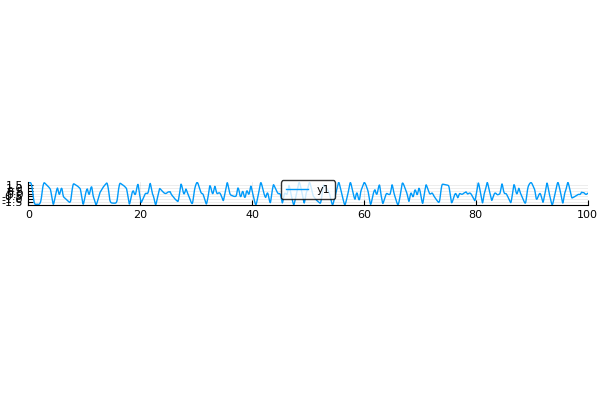

In [180]:
plot(tm,x2,aspect_ratio = :equal)